# Python Xarray Tutorial 

First we import the necessary modules

In [1]:
import numpy as np
import xarray as xr

Now we open a toy weather data example. To open netcdf files in xarray, we use the class xarray DataSet


## DataSet

In [2]:
data_path_precip = '/net/h2o/climphys1/jkuettel/lin_lat_autoencoder_data/regridded_data/CORDEX/KNMI/pr/pr_EUR-11_KNMI_NCC-NorESM1-M_KNMI-RACMO22E_r1i1p1_day_ALPS_historic_and_rcp85.nc'

precip_slow = xr.open_dataset(data_path_precip)

precip_ds = xr.open_dataset(data_path_precip, chunks={"time": 10})



In [3]:
precip_ds

<xarray.Dataset>
Dimensions:       (bnds: 2, rlat: 128, rlon: 128, time: 13050)
Coordinates:
  * time          (time) object 1955-01-01 12:00:00 ... 2099-12-31 12:00:00
    lon           (rlat, rlon) float64 dask.array<chunksize=(128, 128), meta=np.ndarray>
    lat           (rlat, rlon) float64 dask.array<chunksize=(128, 128), meta=np.ndarray>
  * rlon          (rlon) float64 -13.3 -13.2 -13.08 -12.97 ... 0.445 0.555 0.665
  * rlat          (rlat) float64 -8.745 -8.635 -8.525 ... 5.005 5.115 5.225
Dimensions without coordinates: bnds
Data variables:
    time_bnds     (time, bnds) object dask.array<chunksize=(10, 2), meta=np.ndarray>
    rotated_pole  int32 ...
    pr            (time, rlat, rlon) float32 dask.array<chunksize=(10, 128, 128), meta=np.ndarray>
Attributes:
    CDI:                            Climate Data Interface version 1.9.6 (htt...
    history:                        Tue May 25 10:38:11 2021: cdo delete,mont...
    institution:                    Royal Netherlands Meteorological Institute
    Conventions:                    CF-1.4
    contact:                        Erik van Meijgaard, KNMI, Regional Climat...
    experiment:                     Historical run
    experiment_id:                  historical
    realization:                    1
    driving_experiment:             NCC-NorESM1-M,historical,r1i1p1
    driving_model_id:               NCC-NorESM1-M
    driving_model_ensemble_member:  r1i1p1
    driving_experiment_name:        historical
    institute_id:                   KNMI
    model_id:                       KNMI-RACMO22E
    rcm_version_id:                 v1
    references:                     http://www.knmi.nl/research/weather-clima...
    project_id:                     CORDEX
    CORDEX_domain:                  EUR-11
    product:                        output
    frequency:                      day
    knmi_model_comment:             RACMO22E: baseline physics from ECMWF CY3...
    knmi_version_comment:           v1: reference version for Europe and othe...
    knmi_grib_path:                 mos.knmi.nl:/climreg/CXEUR12/eR2v2-v545-f...
    creation_date:                  2019-03-07T17:58:02Z
    c3s_disclaimer:                 This data has been produced in the contex...
    tracking_id:                    25cd7229-8053-4e67-8467-84a52e29784f
    CDO:                            Climate Data Operators version 1.9.6 (htt...

Note that the type is a xarray Dataset:



In [17]:
type(precip_ds)

xarray.core.dataset.Dataset

According to the xarray documentation, a Dataset is a Python object designed as an “in-memory representation of the data model from the NetCDF file format.”

What does that mean? NetCDF files are self-describing in the sense that they include information about the data they contain. When Datasets are created by loading a NetCDF file they load all of the same data and metadata.

Just as a NetCDF file can contain many variables, a Dataset can contain many variables. These variables are referred to as Data Variables in the xarray nomenclature.


Datasets contain three main classes of fields:

- Coordinates : arrays identifying the coordinates of the data variables

- Data Variables: the data variable arrays and their associated coordinates

- Attributes : metadata describing the dataset

Xarray uses dims and coords to enable its core metadata aware operations. Dimensions provide names that xarray uses instead of the axis argument found in many numpy functions. Coordinates enable fast label based indexing and alignment, building on the functionality of the index found on a pandas DataFrame or Series.

The Dimensions list shows all of the different dimensions used by all of the different arrays stored in the NetCDF file (and now loaded in the Dataset object).

Some coordinates have an asterix “*” in front of their names. They are known as dimension coordinates and are always one-dimensional arrays of length n which specify the length of arrays in the dataset in different dimensions.

These coordinates are arrays whose values label each grid cell in the arrays. They are used for label-based indexing and alignment.

### Accesing variables -> DataArray

It is worth looking at the DataArray object in more detail because DataArrays store the arrays that store the ECCO output. Please see the xarray documentation on the DataArray object for more information.

DataArrays are actually very similar to Datasets. They also contain dimensions, coordinates, and attributes. The two main differences between Datasets and DataArrays is that DataArrays have a name (a string) and an array of values. The values array is a numpy n-dimensional array, an ndarray

In [4]:
precip_ds.pr


<xarray.DataArray 'pr' (time: 13050, rlat: 128, rlon: 128)>
dask.array<open_dataset-9f72a3b42e03b0ba578a053ac101f5abpr, shape=(13050, 128, 128), dtype=float32, chunksize=(10, 128, 128), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1955-01-01 12:00:00 ... 2099-12-31 12:00:00
    lon      (rlat, rlon) float64 dask.array<chunksize=(128, 128), meta=np.ndarray>
    lat      (rlat, rlon) float64 dask.array<chunksize=(128, 128), meta=np.ndarray>
  * rlon     (rlon) float64 -13.3 -13.2 -13.08 -12.97 ... 0.445 0.555 0.665
  * rlat     (rlat) float64 -8.745 -8.635 -8.525 -8.415 ... 5.005 5.115 5.225
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    units:          kg m-2 s-1
    grid_mapping:   rotated_pole
    cell_methods:   time: mean

Note that now the type is a xarray DataArray

In [18]:
type(precip_ds.pr)

xarray.core.dataarray.DataArray

In [5]:
#or
precip_ds['pr']

<xarray.DataArray 'pr' (time: 13050, rlat: 128, rlon: 128)>
dask.array<open_dataset-9f72a3b42e03b0ba578a053ac101f5abpr, shape=(13050, 128, 128), dtype=float32, chunksize=(10, 128, 128), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1955-01-01 12:00:00 ... 2099-12-31 12:00:00
    lon      (rlat, rlon) float64 dask.array<chunksize=(128, 128), meta=np.ndarray>
    lat      (rlat, rlon) float64 dask.array<chunksize=(128, 128), meta=np.ndarray>
  * rlon     (rlon) float64 -13.3 -13.2 -13.08 -12.97 ... 0.445 0.555 0.665
  * rlat     (rlat) float64 -8.745 -8.635 -8.525 -8.415 ... 5.005 5.115 5.225
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    units:          kg m-2 s-1
    grid_mapping:   rotated_pole
    cell_methods:   time: mean

In [6]:
precip_ds.time

<xarray.DataArray 'time' (time: 13050)>
array([cftime.DatetimeNoLeap(1955, 1, 1, 12, 0, 0, 0),
       cftime.DatetimeNoLeap(1955, 1, 2, 12, 0, 0, 0),
       cftime.DatetimeNoLeap(1955, 1, 3, 12, 0, 0, 0), ...,
       cftime.DatetimeNoLeap(2099, 12, 29, 12, 0, 0, 0),
       cftime.DatetimeNoLeap(2099, 12, 30, 12, 0, 0, 0),
       cftime.DatetimeNoLeap(2099, 12, 31, 12, 0, 0, 0)], dtype=object)
Coordinates:
  * time     (time) object 1955-01-01 12:00:00 ... 2099-12-31 12:00:00
Attributes:
    standard_name:  time
    long_name:      time
    bounds:         time_bnds
    axis:           T

### Selecting Data

In [7]:
#slecting the first timestep
precip = precip_ds['pr']
precip[0]

<xarray.DataArray 'pr' (rlat: 128, rlon: 128)>
dask.array<getitem, shape=(128, 128), dtype=float32, chunksize=(128, 128), chunktype=numpy.ndarray>
Coordinates:
    time     object 1955-01-01 12:00:00
    lon      (rlat, rlon) float64 dask.array<chunksize=(128, 128), meta=np.ndarray>
    lat      (rlat, rlon) float64 dask.array<chunksize=(128, 128), meta=np.ndarray>
  * rlon     (rlon) float64 -13.3 -13.2 -13.08 -12.97 ... 0.445 0.555 0.665
  * rlat     (rlat) float64 -8.745 -8.635 -8.525 -8.415 ... 5.005 5.115 5.225
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    units:          kg m-2 s-1
    grid_mapping:   rotated_pole
    cell_methods:   time: mean

In [8]:
#slecting the first 10 timestep
precip[0:10]

<xarray.DataArray 'pr' (time: 10, rlat: 128, rlon: 128)>
dask.array<getitem, shape=(10, 128, 128), dtype=float32, chunksize=(10, 128, 128), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1955-01-01 12:00:00 ... 1955-01-10 12:00:00
    lon      (rlat, rlon) float64 dask.array<chunksize=(128, 128), meta=np.ndarray>
    lat      (rlat, rlon) float64 dask.array<chunksize=(128, 128), meta=np.ndarray>
  * rlon     (rlon) float64 -13.3 -13.2 -13.08 -12.97 ... 0.445 0.555 0.665
  * rlat     (rlat) float64 -8.745 -8.635 -8.525 -8.415 ... 5.005 5.115 5.225
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    units:          kg m-2 s-1
    grid_mapping:   rotated_pole
    cell_methods:   time: mean

  However, it is often much more powerful to use xarray's .sel() method to use label-based indexing. This allows us to fetch values based on the value of the coordinate, not the numerical index.

In [9]:
precip.sel(time ='1955-01-01')

<xarray.DataArray 'pr' (time: 1, rlat: 128, rlon: 128)>
dask.array<getitem, shape=(1, 128, 128), dtype=float32, chunksize=(1, 128, 128), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1955-01-01 12:00:00
    lon      (rlat, rlon) float64 dask.array<chunksize=(128, 128), meta=np.ndarray>
    lat      (rlat, rlon) float64 dask.array<chunksize=(128, 128), meta=np.ndarray>
  * rlon     (rlon) float64 -13.3 -13.2 -13.08 -12.97 ... 0.445 0.555 0.665
  * rlat     (rlat) float64 -8.745 -8.635 -8.525 -8.415 ... 5.005 5.115 5.225
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    units:          kg m-2 s-1
    grid_mapping:   rotated_pole
    cell_methods:   time: mean

In [10]:
precip.sel(rlon =-1.3305e+01)

<xarray.DataArray 'pr' (time: 13050, rlat: 128)>
dask.array<getitem, shape=(13050, 128), dtype=float32, chunksize=(10, 128), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1955-01-01 12:00:00 ... 2099-12-31 12:00:00
    lon      (rlat) float64 dask.array<chunksize=(128,), meta=np.ndarray>
    lat      (rlat) float64 dask.array<chunksize=(128,), meta=np.ndarray>
    rlon     float64 -13.3
  * rlat     (rlat) float64 -8.745 -8.635 -8.525 -8.415 ... 5.005 5.115 5.225
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    units:          kg m-2 s-1
    grid_mapping:   rotated_pole
    cell_methods:   time: mean

In [13]:
precip.sel(time = slice('1955-01-01', '1955-12-31'))

<xarray.DataArray 'pr' (time: 90, rlat: 128, rlon: 128)>
dask.array<getitem, shape=(90, 128, 128), dtype=float32, chunksize=(10, 128, 128), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1955-01-01 12:00:00 ... 1955-12-31 12:00:00
    lon      (rlat, rlon) float64 dask.array<chunksize=(128, 128), meta=np.ndarray>
    lat      (rlat, rlon) float64 dask.array<chunksize=(128, 128), meta=np.ndarray>
  * rlon     (rlon) float64 -13.3 -13.2 -13.08 -12.97 ... 0.445 0.555 0.665
  * rlat     (rlat) float64 -8.745 -8.635 -8.525 -8.415 ... 5.005 5.115 5.225
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    units:          kg m-2 s-1
    grid_mapping:   rotated_pole
    cell_methods:   time: mean

If we want to select data based on a numerical array index, we use the method isel() instead of sel()isel

In [25]:
precip.isel(rlat = 1, rlon = 1)

<xarray.DataArray 'pr' (time: 13050)>
dask.array<getitem, shape=(13050,), dtype=float32, chunksize=(10,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1955-01-01 12:00:00 ... 2099-12-31 12:00:00
    lon      float64 dask.array<chunksize=(), meta=np.ndarray>
    lat      float64 dask.array<chunksize=(), meta=np.ndarray>
    rlon     float64 -13.2
    rlat     float64 -8.635
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    units:          kg m-2 s-1
    grid_mapping:   rotated_pole
    cell_methods:   time: mean

## Operations

To do any basic mathematical operation on values, we can treat the xarray as a numpy array:
    

In [27]:
precip = precip * 3600 * 24 # get mm / day

In [28]:
precip.mean().values

array(3.2540963, dtype=float32)

In [29]:
precip.mean(dim = 'time')

<xarray.DataArray 'pr' (rlat: 128, rlon: 128)>
dask.array<mean_agg-aggregate, shape=(128, 128), dtype=float32, chunksize=(128, 128), chunktype=numpy.ndarray>
Coordinates:
    lon      (rlat, rlon) float64 dask.array<chunksize=(128, 128), meta=np.ndarray>
    lat      (rlat, rlon) float64 dask.array<chunksize=(128, 128), meta=np.ndarray>
  * rlon     (rlon) float64 -13.3 -13.2 -13.08 -12.97 ... 0.445 0.555 0.665
  * rlat     (rlat) float64 -8.745 -8.635 -8.525 -8.415 ... 5.005 5.115 5.225

To acces the numeric data, we can transfrom the DataArray to a numpy array:

In [32]:
precip.mean(dim = 'time').values

array([[0.67866   , 0.69610375, 0.71436346, ..., 4.419046  , 4.86195   ,
        5.2984576 ],
       [0.7011414 , 0.7134708 , 0.7517905 , ..., 4.939675  , 5.39512   ,
        5.4797783 ],
       [0.7390264 , 0.7323538 , 0.75912595, ..., 5.531215  , 5.8988733 ,
        8.394934  ],
       ...,
       [4.196511  , 4.2626495 , 4.3423343 , ..., 2.7725673 , 2.8004212 ,
        2.8169596 ],
       [4.161116  , 4.2268767 , 4.310759  , ..., 2.7365317 , 2.7643435 ,
        2.781364  ],
       [4.1331353 , 4.1993785 , 4.2352376 , ..., 2.6984499 , 2.724069  ,
        2.7658563 ]], dtype=float32)

## Groupby 

Returns a GroupBy object for performing grouped operations.

In [33]:
precip.groupby('time.month')

DataArrayGroupBy, grouped over 'month' 
3 groups with labels 1, 2, 12.

In [36]:
monthly_mean = precip.groupby('time.month').mean('time')
monthly_mean

<xarray.DataArray 'pr' (month: 3, rlat: 128, rlon: 128)>
dask.array<stack, shape=(3, 128, 128), dtype=float32, chunksize=(1, 128, 128), chunktype=numpy.ndarray>
Coordinates:
    lon      (rlat, rlon) float64 dask.array<chunksize=(128, 128), meta=np.ndarray>
    lat      (rlat, rlon) float64 dask.array<chunksize=(128, 128), meta=np.ndarray>
  * rlon     (rlon) float64 -13.3 -13.2 -13.08 -12.97 ... 0.445 0.555 0.665
  * rlat     (rlat) float64 -8.745 -8.635 -8.525 -8.415 ... 5.005 5.115 5.225
  * month    (month) int64 1 2 12

In [38]:
monthly_mean.sel(month = 1)

<xarray.DataArray 'pr' (rlat: 128, rlon: 128)>
dask.array<getitem, shape=(128, 128), dtype=float32, chunksize=(128, 128), chunktype=numpy.ndarray>
Coordinates:
    lon      (rlat, rlon) float64 dask.array<chunksize=(128, 128), meta=np.ndarray>
    lat      (rlat, rlon) float64 dask.array<chunksize=(128, 128), meta=np.ndarray>
  * rlon     (rlon) float64 -13.3 -13.2 -13.08 -12.97 ... 0.445 0.555 0.665
  * rlat     (rlat) float64 -8.745 -8.635 -8.525 -8.415 ... 5.005 5.115 5.225
    month    int64 1

Famous example: deseasonalizing climate data

In [40]:
def deseasonalizing(x_array):
    climatology = x_array.groupby('time.month').mean('time')
    anomalies = x_array.groupby('time.month') - climatology
    return anomalies

In [41]:
deseasonalizing(precip)

<xarray.DataArray 'pr' (time: 13050, rlat: 128, rlon: 128)>
dask.array<getitem, shape=(13050, 128, 128), dtype=float32, chunksize=(10, 128, 128), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1955-01-01 12:00:00 ... 2099-12-31 12:00:00
    lon      (rlat, rlon) float64 dask.array<chunksize=(128, 128), meta=np.ndarray>
    lat      (rlat, rlon) float64 dask.array<chunksize=(128, 128), meta=np.ndarray>
  * rlon     (rlon) float64 -13.3 -13.2 -13.08 -12.97 ... 0.445 0.555 0.665
  * rlat     (rlat) float64 -8.745 -8.635 -8.525 -8.415 ... 5.005 5.115 5.225
    month    (time) int64 1 1 1 1 1 1 1 1 1 1 ... 12 12 12 12 12 12 12 12 12 12

## Plotting

For simple plots, we can add a plot function at the end of our data


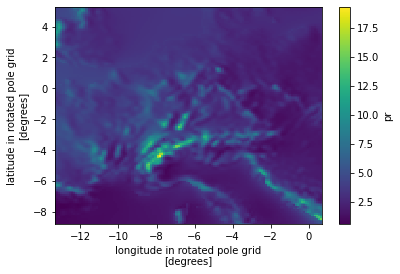

In [42]:
precip.mean(dim = 'time').plot()

Min and Max are controlled by a vmin and vmaxprecip.mean(dim = 'time').plot()

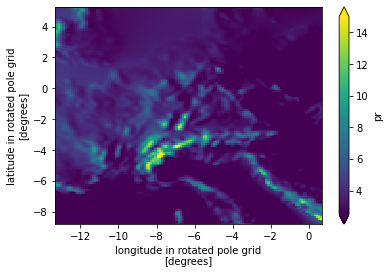

In [43]:
precip.mean(dim = 'time').plot(vmin = 2.5, vmax = 15)

In [47]:
Alps = precip.sel(rlon = slice(-10, -4), rlat = slice(-5, -2))

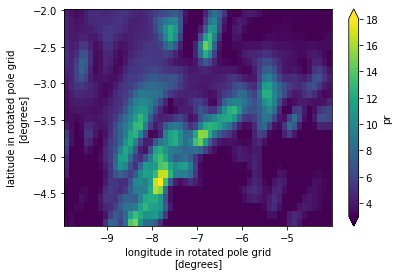

In [50]:
Alps.mean(dim = 'time').plot(vmin = 3, vmax = 18)

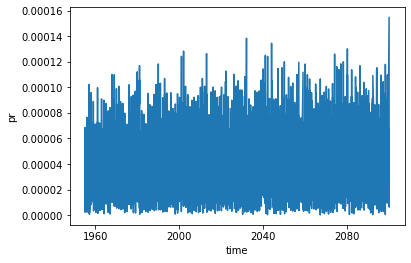

In [21]:
precip.mean(dim = ('rlon', 'rlat')).plot()

Looks messy, we can do a yearly mean to reduce the variability

In [55]:
yearly_precip = precip.groupby('time.year').mean('time')


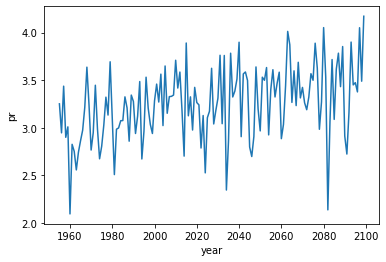

In [56]:
yearly_precip.mean(dim = ('rlon', 'rlat')).plot()

## Cartopy Tutorial

For plots with publicaton quality, we use the cartopy library running on top of xarray and matplotlib. First we need a matplotlib tutorial to understand the basics

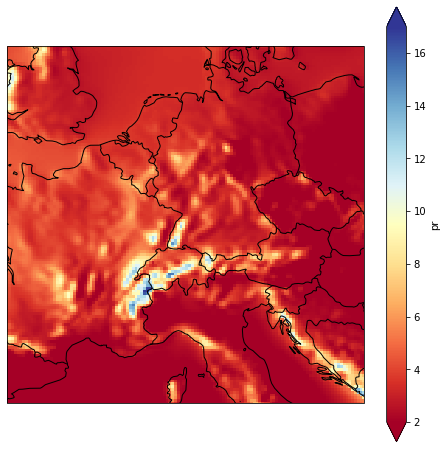

In [62]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

plt.figure(figsize=(8, 8))

rotated_pole = ccrs.RotatedPole(pole_latitude=39.25, pole_longitude=198)
extent = [-13.305, 0.665, -8.745, 5.225]

ax = plt.axes(projection = rotated_pole)
ax.set_extent(extent, crs=rotated_pole)
ax.coastlines()
ax.add_feature(cfeature.BORDERS)

precip.mean(dim = 'time').plot(transform=rotated_pole, cmap = 'RdYlBu', vmin=2, vmax=17
            )



In [74]:
class test:
    def __init__(self):
        self.x = 0
        self.y = 0

    def change_x(self, new_value):
        self.x = new_value


Christa = test()

In [73]:
Christa.x


0

In [75]:
Christa.change_x(6)

In [76]:
Christa.x

6

In [77]:
Christa.x  = 5

In [78]:
Christa.x

5